In [1]:
# Make sure that you have all these libaries available to run the code successfully
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json 
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [2]:
APIKey='53QLBZ72YJCXQ8OT'

In [3]:
# data_source = 'alphavantage' # alphavantage or kaggle

# if data_source == 'alphavantage':
#     # ====================== Loading Data from Alpha Vantage ==================================

#     api_key = '53QLBZ72YJCXQ8OT'

#     # American Airlines stock market prices
#     ticker = "AAL" 

#     # JSON file with all the stock market data for AAL within the last 20 years
#     url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)

#     # Save data to this file
#     file_to_save = 'stock_market_data-%s.csv'%ticker

#     # If you haven't already saved data,
#     # Go ahead and grab the data from the url
#     # And store date, low, high, volume, close, open values to a Pandas dataframe
#     if not os.path.exists(file_to_save):
#         with urllib.request.urlopen(url_string) as url:
#             data = json.loads(url.read().decode())
#             # extract stock market data
#             data = data['Time Series (Daily)']
#             df = pd.DataFrame(columns=['Date','Low','High','Close','Open'])
#             for k,v in data.items():
#                 date = dt.datetime.strptime(k, '%Y-%m-%d')
#                 data_row = [date.date(),float(v['3. low']),float(v['2. high']),
#                             float(v['4. close']),float(v['1. open'])]
#                 df.loc[-1,:] = data_row
#                 df.index = df.index + 1
#         print('Data saved to : %s'%file_to_save)        
#         df.to_csv(file_to_save)

#     # If the data is already there, just load it from the CSV
#     else:
#         print('File already exists. Loading data from CSV')
#         df = pd.read_csv(file_to_save)

# else:
    
#     # ====================== Loading Data from Kaggle ==================================
#     # You will be using HP's data. Feel free to experiment with other data. 
#     # But while doing so, be careful to have a large enough dataset and also pay attention to the data normalization
#     df = pd.read_csv(os.path.join('Stocks','hpq.us.txt'),delimiter=',',usecols=['Date','Open','High','Low','Close'])
#     print('Loaded data from the Kaggle repository')

In [4]:
df=pd.read_csv('data/Stocks/hpq.us.txt')

In [5]:
df = df.sort_values('Date')

In [6]:
df.shape

(12075, 7)

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1970-01-02,0.30627,0.30627,0.30627,0.30627,2441124,0
1,1970-01-05,0.30627,0.31768,0.30627,0.31385,6219848,0
2,1970-01-06,0.31385,0.31385,0.30996,0.30996,4447522,0
3,1970-01-07,0.31385,0.31385,0.31385,0.31385,1872638,0
4,1970-01-08,0.31385,0.31768,0.31385,0.31385,4280330,0


In [8]:
df.tail(10)

,Date,Open,High,Low,Close,Volume,OpenInt
12065,2017-10-30,21.47,21.530,21.32,21.39,7459770,0
12066,2017-10-31,21.43,21.705,21.43,21.55,9732527,0
12067,2017-11-01,21.60,21.640,21.39,21.47,8813665,0
12068,2017-11-02,21.38,21.560,21.07,21.44,14764943,0
12069,2017-11-03,21.50,21.550,21.33,21.47,7709902,0
12070,2017-11-06,21.47,21.530,21.38,21.44,13309476,0
12071,2017-11-07,21.47,21.470,21.32,21.38,6245536,0
12072,2017-11-08,21.34,21.470,21.24,21.42,6061868,0
12073,2017-11-09,21.27,21.400,21.15,21.34,5844935,0
12074,2017-11-10,21.25,21.310,21.14,21.23,6276650,0


In [9]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,12075.000000,12075.000000,12075.000000,12075.000000,1.207500e+04,12075.0
mean,6.735977,6.834001,6.644309,6.740256,2.017996e+07,0.0
std,6.349568,6.444463,6.261201,6.354457,2.128070e+07,0.0
min,0.118670,0.118670,0.114820,0.114820,0.000000e+00,0.0
25%,1.056300,1.071800,1.044900,1.056300,7.188568e+06,0.0
50%,3.755000,3.793100,3.712800,3.751100,1.429145e+07,0.0
75%,11.654500,11.856500,11.482000,11.664000,2.675206e+07,0.0
max,29.328000,29.857000,28.062000,29.857000,5.239469e+08,0.0


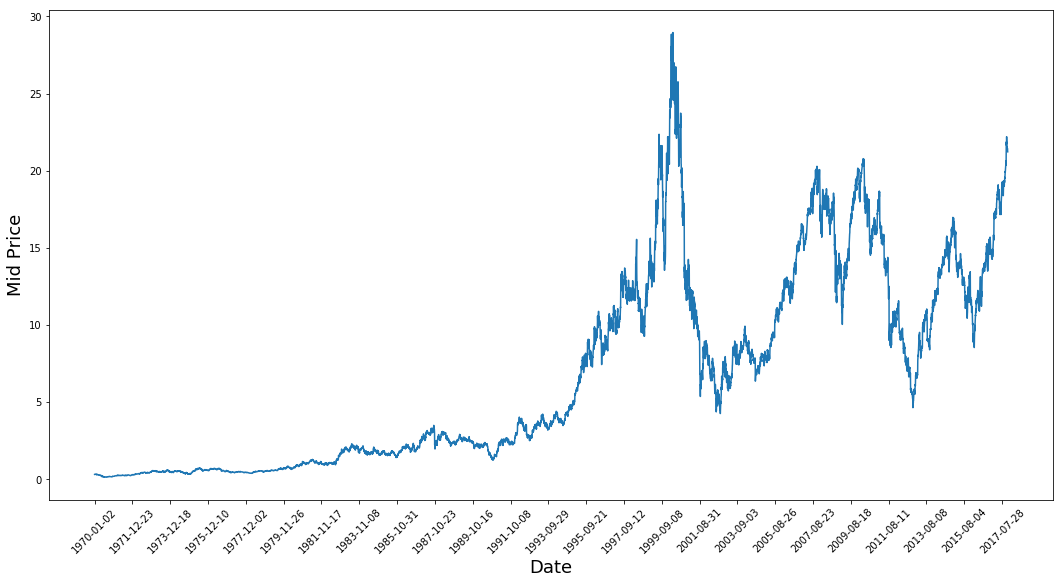

In [10]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

### Breaking data to Train and Test and Normalizing data
You will use the mide price calculated by taking the average of the highest and lowest recorded prices on a day

In [11]:
# First calculate the mid prices from the highest and lowest 
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
train_data = mid_prices[:11000]
test_data = mid_prices[11000:]

In [13]:
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data w.r.t training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [14]:
# Train the Scaler with training data and smooth data 
smoothing_window_size = 2500
for di in range(0,10000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data 
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [15]:
# Reshape data back to the shape of data_size 
# Reshape both train and test data
train_data=train_data.reshape(-1)
test_data = scaler.transform(test_data).reshape(-1)

In [17]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(11000):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [18]:
class DataGeneratorSeq(object):
    
    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):
        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)
        
        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)
                
            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(1,5)]
            
            self._cursor[b] = (self._cursor[b]+1)%self._prices_length
            
        return batch_data,batch_labels
    
    def unroll_batches(self):
        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):
            
            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels
    
    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))

dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [0.00314379 0.678683   0.7853376  0.31454417 0.11405563]

	Output: [0.01670584 0.680972   0.7943447  0.3174311  0.11555188]


Unrolled index 1
	Inputs:  [0.00889725 0.67972225 0.7900572  0.31594765 0.11443558]

	Output: [0.03680944 0.68136084 0.7943447  0.3203722  0.11673178]


Unrolled index 2
	Inputs:  [0.01670584 0.6804352  0.7943447  0.3174311  0.11493899]

	Output: [0.04839033 0.680972   0.8017215  0.32175604 0.11615521]


Unrolled index 3
	Inputs:  [0.02613326 0.680972   0.79820514 0.31890768 0.11555188]

	Output: [0.06068354 0.6816976  0.8048635  0.3203722  0.11784896]


Unrolled index 4
	Inputs:  [0.03680944 0.68136084 0.8017215  0.3203722  0.11615521]

	Output: [0.07349433 0.68172854 0.81040925 0.32495394 0.11784896]


### Defining Hyperparameters

In [20]:
D = 1 # Dimensionality of the data. Since our data is 1-D this would be 1
num_unrollings = 50 # Number of time steps you look into the future.
batch_size = 500 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.reset_default_graph() # This is important in case you run this multiple times

### Defining Inputs and Outputs

In [21]:
# Input data.
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

### Defining Parameters of the LSTM and Regression Layer

In [22]:
lstm_cells = [
    tf.contrib.rnn.LSTMCell(num_units=num_nodes[li],state_is_tuple=True,
                            initializer= tf.contrib.layers.xavier_initializer()) 
    for li in range(n_layers)]

drop_lstm_cells = [
    tf.contrib.rnn.DropoutWrapper(lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, 
                                  state_keep_prob=1.0-dropout) for lstm in lstm_cells]

drop_multi_cell = tf.contrib.rnn.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

### Calculating LSTM output and Feeding it to the regression layer to get final prediction

In [23]:
# Create cell state and hidden state variables to maintain the state of the LSTM
c, h = [],[]
initial_state = []
for li in range(n_layers):
    c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
    h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
    initial_state.append(tf.contrib.rnn.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of 
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

### Loss Calculation and Optimizer

In [24]:
# When calculating the loss you need to be careful about the exact form, because you calculate
# loss of all the unrolled steps at the same time
# Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps

print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
    for ui in range(num_unrollings):
        loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, 
                               staircase=True),tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(zip(gradients, v))

print('\tAll done')

Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done


### Prediction related calculations

In [25]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
    sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
    sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
    initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) 
                                 for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) 
                                 for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):
    sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining prediction related TF functions
	All done


### Running LSTM

In [26]:
epochs = 30
valid_summary = 1 # Interval you make test predictions

n_predict_once = 50 # Number of steps you continously predict for

train_seq_length = train_data.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings) 

x_axis_seq = []

# Points you start our test predictions from
test_points_seq = np.arange(11000,12000,50).tolist() 

for ep in range(epochs):       
    
    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):
        
        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)
        
        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l
    
    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:
        average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))
        # The average loss
        if (ep+1)%valid_summary==0:
            print('Average loss at step %d: %f' % (ep+1, average_loss))
        
        train_mse_ot.append(average_loss)
        
        average_loss = 0 # reset loss
        
        predictions_seq = []
        
        mse_test_loss_seq = []
        
        # ===================== Updating State and Making Predicitons ========================
        for w_i in test_points_seq:
            mse_test_loss = 0.0
            our_predictions = []
            
            if (ep+1)-valid_summary==0:
                # Only calculate x_axis values in the first validation epoch
                x_axis=[]
            
            # Feed in the recent past behavior of stock prices
            # to make predictions from that point onwards
            for tr_i in range(w_i-num_unrollings+1,w_i-1):
                current_price = all_mid_data[tr_i]
                feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)
                _ = session.run(sample_prediction,feed_dict=feed_dict)
                
            feed_dict = {}
            
            current_price = all_mid_data[w_i-1]
            
            feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)
            
            # Make predictions for this many steps
            # Each prediction uses previous prediciton as it's current input
            for pred_i in range(n_predict_once):
                pred = session.run(sample_prediction,feed_dict=feed_dict)
                our_predictions.append(np.asscalar(pred))
                feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)
                
                if (ep+1)-valid_summary==0:
                    # Only calculate x_axis values in the first validation epoch
                    x_axis.append(w_i+pred_i)
                
                mse_test_loss += 0.5*(pred-all_mid_data[w_i+pred_i])**2
            
            session.run(reset_sample_states)
            
            predictions_seq.append(np.array(our_predictions))
            
            mse_test_loss /= n_predict_once
            mse_test_loss_seq.append(mse_test_loss)
            
            if (ep+1)-valid_summary==0:
                x_axis_seq.append(x_axis)
        
        current_test_mse = np.mean(mse_test_loss_seq)
        
        # Learning rate decay logic
        if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
            loss_nondecrease_count += 1
        else:
            loss_nondecrease_count = 0
        
        if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')
        
        test_mse_ot.append(current_test_mse)
        print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
        predictions_over_time.append(predictions_seq)
        print('\tFinished Predictions')

Initialized
Average loss at step 1: 2.490912
	Test MSE: 0.01973
	Finished Predictions
Average loss at step 2: 0.139408
	Test MSE: 0.00683
	Finished Predictions
Average loss at step 3: 0.074348
	Test MSE: 0.00446
	Finished Predictions
Average loss at step 4: 0.060622
	Test MSE: 0.00337
	Finished Predictions
Average loss at step 5: 0.052185
	Test MSE: 0.00293
	Finished Predictions
Average loss at step 6: 0.047325
	Test MSE: 0.00241
	Finished Predictions
Average loss at step 7: 0.044425
	Test MSE: 0.00257
	Finished Predictions
Average loss at step 8: 0.041727
	Test MSE: 0.00239
	Finished Predictions
Average loss at step 9: 0.041941
	Test MSE: 0.00427
	Finished Predictions
Average loss at step 10: 0.039206
	Test MSE: 0.00297
	Finished Predictions
Average loss at step 11: 0.036792
	Decreasing learning rate by 0.5
	Test MSE: 0.00240
	Finished Predictions
Average loss at step 12: 0.033953
	Test MSE: 0.00243
	Finished Predictions
Average loss at step 13: 0.033401
	Test MSE: 0.00283
	Finished P

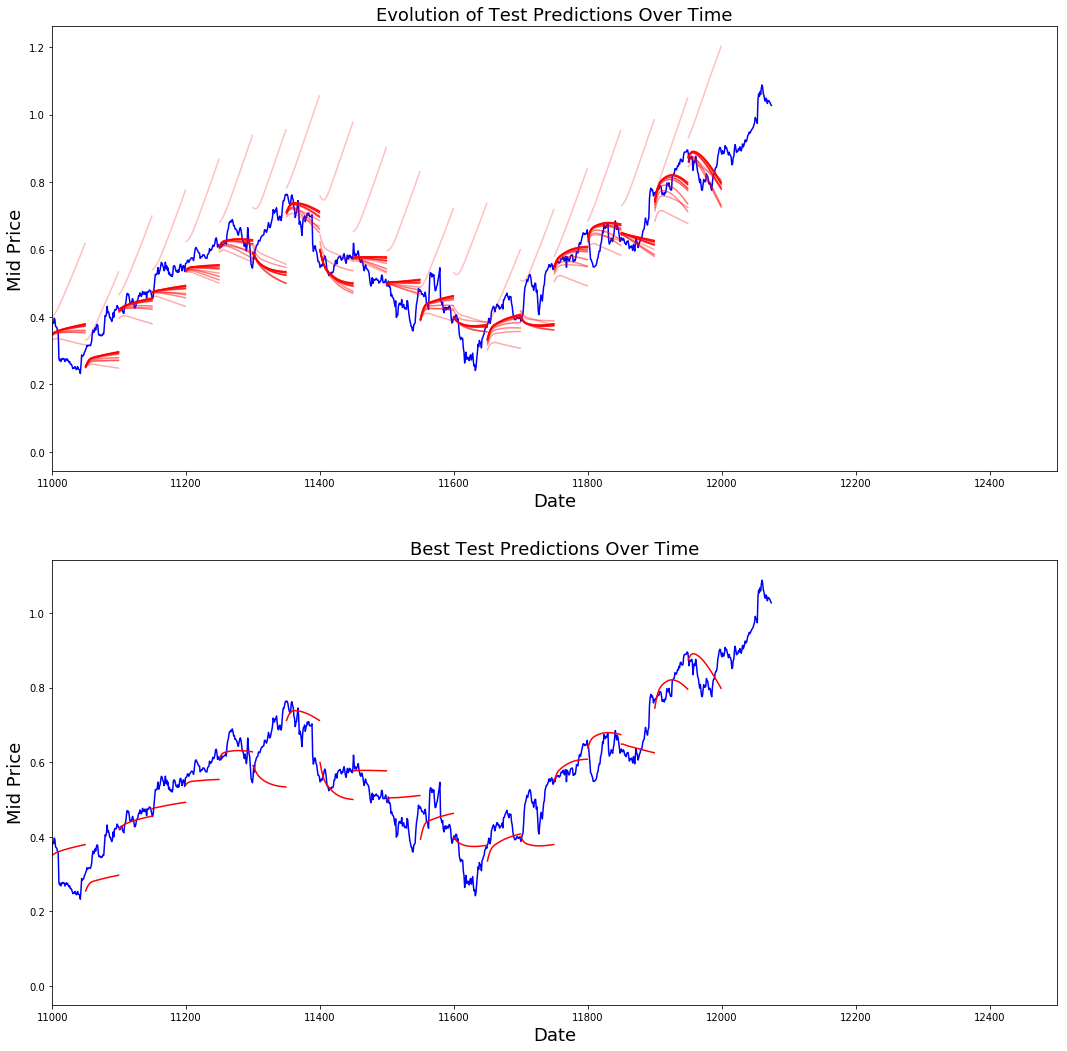

In [30]:
best_prediction_epoch = 26 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(df.shape[0]),all_mid_data,color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='r',alpha=alpha[p_i])

plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(11000,12500)

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(df.shape[0]),all_mid_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')
    
plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(11000,12500)
plt.show()